#離職者予想AIおよび離職者傾向分析

福井県立大学 生物資源学部 生物資源学科 2年

高﨑仁美

##0 概要

* 使用言語：python

* 使用したツール：Google colab

* 分析対象：Excelにて蓄積された従業員データ

* 想定する使い方：会社の人事データからその人が離職しやすいかを予測する

* 基本的な使い方：セルにマウスカーソルを合わせた際に出てくる再生ボタンを押すことでそのセルを実行することが可能

### 注意事項

1.   セル結合がなされたデータは使用できません。結合を解除し、データを埋めてからお使いください。
2.   元のExcelのデータは必ずカラム名が1行目、データ自体はA2から始まるよう調節をお願いします。
3.   想定外のバグにつながりますので、必ず順番通り・指示通りに実行するようお願いします。
4.   目的変数 (ここでいう離職したかしていないか) のデータは欠損がないようお願いします。

### 使用するデータセットに関して

今回は例として以下のサイトからデータを拝借いたしました。
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/discussion/86957


実用化される時を想定し、[Googleフォーム](https://forms.gle/QMokMW2EyEJGZJcd6)にてテンプレートを作成いたしました。以下の指示に従って実装してください。

1.   フォームに回答する
2.   回答結果をスプレッドシートにて確認
3.   スプレッドシートをExcelにする
4.   新しくカラムを追加し、離職したかしていないかを記載
5.   機械学習に導入

  詳しい導入方法は軽いデータの可視化を参照してください
スプレッドシートをExcelにして導入してください。



## 1 データの可視化

### 1.1 データの導入

In [ ]:
# 必要なライブラリをimport
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
#最大表示行数の指定
pd.set_option('display.max_columns', 100)

次のセルを実行するにあたり、Googleアカウントへのアクセスが求められます。以下の指示に従い、処理を行ってください。



1.   以下のコードを実行する
2.   「このノートブックにGoogle ドライブのファイルへのアクセスを許可しますか？」というウィンドウが出てくるので、「Google ドライブに接続」をクリック
3.   アカウントを選択する画面が出てくるので、任意のアカウントを選択する
4.   「Google Drive for desktopにログイン」という画面が出てくるので、次へをクリック
5.   「Google Drive for desktopがGoogle アカウントへの追加アクセスを求めています」という画面が出てくるので、続行をクリック

  (この時、選択したGoogle アカウントのGmailに「Googleからお使いのGoogle アカウントへのアクセスがGoogle Drive for desktopに許可されました」という文言が書かれたメールを受け取ることになる)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

次のセルのコードは人によって異なります。以下の指示に従ってコードを各自書き換えてください。

1.   添付したExcelのデータセットをGoogleドライブに入れる
2.  左側に表示されている以下のマークをクリックし、1で導入したファイルを探す

    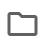


2.   三点リーダーをクリック
3.   「パスをコピー」をクリックし、パスをコピーする
4.  `df = pd.read_csv('`**ここにペースト**`')`

In [ ]:
# dataを読み込む
df = pd.read_csv('/content/drive/MyDrive/福井ソフトウェアコンペティション/Attrition_data.csv')

きちんとデータが導入されたか確認するために一度データを表示させます。

In [ ]:
# データの確認
print(f"df shape: {df.shape}")
df.head(5)

これでデータが入ったことが確認できました。

###1.2 データをグラフにする

Sweetvizというモジュールを使って全体のデータをグラフ化してみます。実行は時間がかかります。

他のデータを扱う場合は以下のコードの部分を指示通りに書き換えてください。

`eda = sv.analyze(df,target_feat="Attrition")`

`Attrition`の部分を任意の目的変数のカラム名に書き換える

In [ ]:
!pip install sweetviz

import sweetviz as sv

In [ ]:
# 目的変数の名前を入力する関数
def input_target_variable():
    target_variable = input("目的変数の名前を入力してください: ")
    return target_variable

# ユーザーから目的変数を取得
target_variable = input_target_variable()

# 選択された目的変数を表示
print(f"目的変数は: {target_variable}")


In [ ]:
# df を分析するために sweetviz を使用
eda = sv.analyze(df)

# Data というラベル付ける
eda = sv.analyze([df, "Data"])

In [ ]:
# sweetvizの結果を表示
eda.show_notebook()

上記の情報をもとに列名を日本語に翻訳したものになります。

|列| 名称（日本語） | 説明 |
| --- | --- | --- |
|Age| 年齢 | 数値 |
|Attrision| 離職 | 文字列 - 従業員の退職 |
|BusinessTravel|出張頻度 | 文字列 - 出張なし, 頻繁に出張, 稀に出張 |
|DailyAchievement| 日間業績 | 数値 - 日間業績レベル |
|Department| 部門 | 文字列 - 人事, 研究開発, 営業 |
|DistanceFromHome| 自宅からの距離 | 数値 - 職場から自宅までの距離 |
|Education| 教育 | 文字列 - カレッジ未満, カレッジ, 学士, 修士, 博士 |
|EducationField| 教育分野 | 文字列 - 人事, 生命科学, マーケティング, 医学, その他, 技術 |
|EmployeeCount| 従業員数 | 数値 |
|EmployeeNumber| 従業員番号 | 数値 - 従業員ID |
|EnvironmentSatisfaction| 環境満足度 | 文字列 - 低い, 中程度, 高い, 非常に高い |
|Gender| 性別 | 文字列 - 女性, 男性 |
|HourlyAchievement| 時間業績 | 数値 - 時間業績 |
|JobInvolvement| 職務関与度 | 文字列 - 低い, 中程度, 高い, 非常に高い |
|JobLevel| 職位 | 数値 - 職のレベル |
|JobRole| 職務役割 | 文字列 - HC代表, 人事, ラボ技術者, マネージャー, 管理ディレクター, 研究ディレクター, 研究科学者, 営業エグゼクティブ, 営業担当 |
|JobSatisfaction| 職務満足度 | 文字列 - 低い, 中程度, 高い, 非常に高い |
|MaritalStatus| 婚姻状況 | 文字列 - 離婚, 既婚, 独身 |
|MonthlyIncome| 月給 | 数値 - 月給 |
|MonthlyAchievement| 月間業績 | 数値 - 月間業績 |
|NumCompaniesWorked| 勤務した会社数 | 数値 - 勤めた会社の数 |
|Over18| 18歳以上 | 文字列 - はい, いいえ |
|OverTime| 残業 | 文字列 - いいえ, はい |
|PercentSalaryHike| 給与増加率 | 数値 - 給与の増加率。2年間（2017年、2018年）の給与変動の割合 |
|PerformanceRating| パフォーマンス評価 | 文字列 - 低い, 良い, 優秀, 非常に優秀 |
|RelationshipSatisfaction| 関係満足度 | 文字列 - 低い, 中程度, 高い, 非常に高い |
|StandardHours| 標準労働時間 | 数値 - 標準労働時間 |
|StockOptionLevel| 株式オプションレベル | 数値 - 株式オプション。この会社の株式をどれだけ所有しているか |
|TotalWorkingYears| 総勤務年数 | 数値 - 総勤務年数 |
|TrainingTimesLastYear| 昨年の研修回数 | 数値 - 昨年の研修で費やした時間 |
|WorkLifeBalance |ワークライフバランス | 文字列 - 悪い, 良い, より良い, 最良 |
|YearsAtCompany |会社勤続年数 | 数値 - 会社での総勤務年数 |
|YearsInCurrentRole| 現在の役割での年数 |数値 - 現在の役割での年数|
|YearsSinceLastPromotion|最後の昇進からの年数|数値 - 最後の昇進からの年数|
|YearsWithCurrManager|現在のマネージャーとの年数|数値 - 現在のマネージャーとの勤務年数|

日本語を数字に直したデータの可視化も行っておきます。実行理由は以下の二点です。



1.   上記のコードでグラフを表示させたときに文字化けがあった場合のデータの可視化手段
2.   データの可視化への利用


何の数字が何を指名しているのかをもとのデータと照らし合わせて確認するようにしてください。

ここではすべてラベルエンコーディングをしておきます。

In [ ]:
# このセルの次の3つのセルを実行し、文字化けしていたら実行

# LabelEncoderのインスタンスを作成
label_encoder = LabelEncoder()

# 各カラムに対してラベルエンコーディングを実行
df_eda = df.copy()  # 新しいDataFrameにコピーして変更を加える
for column in df_eda.columns:
    if df_eda[column].dtype == 'object':  # カテゴリカル変数のみ処理
        df_eda[column] = label_encoder.fit_transform(df_eda[column])

df_eda.head()

In [ ]:
!pip install sweetviz

import sweetviz as sv

In [ ]:
eda = sv.analyze(df_eda)

eda = sv.analyze([df_eda, "Data"])

In [ ]:
eda.show_notebook()

上記の処理を行った場合は以下のような形にデータになります。

|列| 名称（日本語） | 説明 |
| --- | --- | --- |
|Age| 年齢 | 数値 |
|Attrision| 離職 | 従業員の退職（0=いいえ, 1=はい） |
|BusinessTravel|出張頻度 | (1=出張なし, 2=頻繁に出張, 3=稀に出張) |
|DailyAchievement| 日間業績 | 数値 - 日間業績レベル |
|Department| 部門 | (1=人事, 2=研究開発, 3=営業) |
|DistanceFromHome| 自宅からの距離 | 数値 - 職場から自宅までの距離 |
|Education| 教育 | (1=カレッジ未満, 2=カレッジ, 3=学士, 4=修士, 5=博士) |
|EducationField| 教育分野 | (1=人事, 2=生命科学, 3=マーケティング, 4=医学, 5=その他, 6=技術) |
|EmployeeCount| 従業員数 | 数値 |
|EmployeeNumber| 従業員番号 | 数値 - 従業員ID |
|EnvironmentSatisfaction| 環境満足度 | (1=低い, 2=中程度, 3=高い, 4=非常に高い) |
|Gender| 性別 | (1=女性, 2=男性) |
|HourlyAchievement| 時間業績 | 数値 - 時間業績 |
|JobInvolvement| 職務関与度 | (1=低い, 2=中程度, 3=高い, 4=非常に高い) |
|JobLevel| 職位 | 数値 - 職のレベル |
|JobRole| 職務役割 | (1=HC代表, 2=人事, 3=ラボ技術者, 4=マネージャー, 5=管理ディレクター, 6=研究ディレクター, 7=研究科学者, 8=営業エグゼクティブ, 9=営業担当) |
|JobSatisfaction| 職務満足度 | (1=低い, 2=中程度, 3=高い, 4=非常に高い) |
|MaritalStatus| 婚姻状況 | (1=離婚, 2=既婚, 3=独身) |
|MonthlyIncome| 月給 | 数値 - 月給 |
|MonthlyAchievement| 月間業績 | 数値 - 月間業績 |
|NumCompaniesWorked| 勤務した会社数 | 数値 - 勤めた会社の数 |
|Over18| 18歳以上 | (1=はい, 2=いいえ) |
|OverTime| 残業 | (1=いいえ, 2=はい) |
|PercentSalaryHike| 給与増加率 | 数値 - 給与の増加率。2年間（2017年、2018年）の給与変動の割合 |
|PerformanceRating| パフォーマンス評価 | (1=低い, 2=良い, 3=優秀, 4=非常に優秀) |
|RelationshipSatisfaction| 関係満足度 | (1=低い, 2=中程度, 3=高い, 4=非常に高い) |
|StandardHours| 標準労働時間 | 数値 - 標準労働時間 |
|StockOptionLevel| 株式オプションレベル | 数値 - 株式オプション。この会社の株式をどれだけ所有しているか |
|TotalWorkingYears| 総勤務年数 | 数値 - 総勤務年数 |
|TrainingTimesLastYear| 昨年の研修回数 | 数値 - 昨年の研修で費やした時間 |
|WorkLifeBalance |ワークライフバランス | (1=悪い, 2=良い, 3=より良い, 4=最良) |
|YearsAtCompany |会社勤続年数 | 数値 - 会社での総勤務年数 |
|YearsInCurrentRole| 現在の役割での年数 |数値 - 現在の役割での年数|
|YearsSinceLastPromotion|最後の昇進からの年数|数値 - 最後の昇進からの年数|
|YearsWithCurrManager|現在のマネージャーとの年数|数値 - 現在のマネージャーとの勤務年数|

###1.3 データの中身の把握

データの持つ情報を確認します。
何のカラムがいくつあるか、数列か文字列型かを見ることができます。

In [ ]:
df.info()

基本統計量を見てみます。

ここで大体のデータの傾向を確認します。

*   数
*   平均
*   標準偏差
*   最小値
*   第一四分位数
*   中央値
*   第三四分位数
*   最大値



In [ ]:
df.describe()

この後データの前処理を行うのですが、その際、任意のデータにどのような処理が必要なのかをグラフや上の表で確認します。主な確認事項は以下の通りです。

* count：欠損値の有無の確認
* min や max：外れ値の確認 (mean や 第一四分位数、中央値。第三四分位数と比較しながら、あまりに値が離れていることがあれば外れ値としてカウントします)

## 2 データの前処理

### 2.1 表記の揺れの統一

自由表記の場合、人によって表記の仕方が違う場合があります。それら表記の揺れをここで正規化し、同一の表記として扱えるようにします。

同一の表記として扱われる例としては、以下のようなものが挙げられます。

* 全角と半角の混在: "１２３" と "123"  、"ＡＢＣ" と "ABC"
* カタカナ表記揺れ: "ｶﾀｶﾅ" と "カタカナ"
* 日本語の正規化: "ﾃｽﾄ" と "テスト"

※このデータでは実行の必要がないため、以下二つのセルは実行しないようお願いします。実行した場合は画面上の「ランタイム」ボタンから「ランタイムを再接続する」をクリックし、初めからコードを実行しなおしてください。

In [ ]:
!pip install neologdn

In [ ]:
import neologdn
import unicodedata


def normalize_text(text):
    # 文字列型の場合のみ正規化
    if isinstance(text, str):
        # 日本語テキストの正規化
        normalized_text = neologdn.normalize(text)
        # 全角英数字を半角英数字に変換
        normalized_text = ''.join([unicodedata.normalize('NFKC', char) if char.isnumeric() else char for char in normalized_text])
        return normalized_text
    else:
        # 文字列型でない場合はそのまま返す
        return text

# データフレームの各要素に関数を適用
df = df.applymap(normalize_text)

df.head()

### 2.2 外れ値の処理

データの中にある異常な値を処理します。外れ値を含んで機械学習を行いたい場合は飛ばしてください。今回は外れ値を除去する方法と欠損値として扱うコードを紹介します。外れ値の処理に関してはいくつか方法があるため、用途に応じて使い分けてください。

使い方は以下の通りです。

`column_name`を任意のカラム名に書き換えてください。

※このデータでは実行の必要がないため、以下4 つのセルは実行しないようお願いします。実行した場合は画面上の「ランタイム」ボタンから「ランタイムを再接続する」をクリックし、初めからコードを実行しなおしてください。

まずは外れ値を含んだカラムごと除去するコードを紹介します。

**閾値による外れ値の除去**

ある閾値を設定し、その閾値を超える外れ値を除外する方法です。

ここでは平均値±2標準偏差以内のデータを正常範囲として、それを超えるデータを外れ値と見なすことにします。

In [ ]:
mean_value = df['column_name'].mean()
std_value = df['column_name'].std()
threshold = 2

df = df[(df['column_name'] >= mean_value - threshold * std_value) & (df['column_name'] <= mean_value + threshold * std_value)]

**四分位範囲を用いた外れ値の除去**

データの中央50%に対する範囲を用いて外れ値を検出し、それを除外する方法です。四分位範囲を1.5倍に拡大し、そこから外れる値を外れ値とします。

In [ ]:
Q1 = df['column_name'].quantile(0.25)
Q3 = df['column_name'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['column_name'] >= Q1 - 1.5 * IQR) & (df['column_name'] <= Q3 + 1.5 * IQR)]

次に外れ値を欠損値として置き換える方法を紹介します。この方法を採用する場合、のちに出てくる「欠損値の補完」を行ってください。

**閾値を設定し、外れ値を欠損値に置き換える**

ある閾値を設定し、その閾値を超える外れ値を欠損値に置き換える方法です。

ここでは平均値±2標準偏差以内のデータを正常範囲として、それを超えるデータを外れ値と見なすことにします。

In [ ]:
mean_value = df['column_name'].mean()
std_value = df['column_name'].std()
threshold = 2

df['column_name'][(df['column_name'] < mean_value - threshold * std_value) | (df['column_name'] > mean_value + threshold * std_value)] = np.nan

**四分位範囲を用いて外れ値を欠損値に置き換える**

データの中央50%に対する範囲を用いて外れ値を検出し、それを欠損値に置き換える方法です。四分位範囲を1.5倍に拡大し、そこから外れる値を外れ値とします。

In [ ]:
Q1 = df['column_name'].quantile(0.25)
Q3 = df['column_name'].quantile(0.75)
IQR = Q3 - Q1

df['column_name'][(df['column_name'] < Q1 - 1.5 * IQR) | (df['column_name'] > Q3 + 1.5 * IQR)] = np.nan

### 2.3 データの成型

まずはカラムを確認します。ここでは変形する必要があるデータについて確認します。機械学習では文字列で表記されているデータは読み込むことができません。そのため、何のデータが文字列型なのかを確認し、数値に変換する必要があります。

まずは文字列で表記されているデータを確認します。

In [ ]:
df.select_dtypes(include=object)

このデータでは文字列型で表記されたカラムが9個あることがわかりました。

それぞれのカラムの要素や要素数を調べてみます。

他のデータに当てはめる場合に関しては以下を参考にデータを確認してみてください。



1.   下のセルを以下のコードに書き換える

  `df['column_name'].value_counts()`


2.   `column_name`と書いてある部分に上の表の一番上に書かれたカラム名を記入する。

複数のカラムが文字列型で表記されている場合は1,2を任意の個数分繰り返してください

In [ ]:
# BusinessTravel：出張
df['BusinessTravel'].value_counts()

In [ ]:
# Department：部門
df['Department'].value_counts()

In [ ]:
# EducationField：大学の学部
df['EducationField'].value_counts()

In [ ]:
# Gender
df['Gender'].value_counts()

In [ ]:
# JobRole：役職
df['JobRole'].value_counts()

In [ ]:
# MaritalStatus：結婚してるか
df['MaritalStatus'].value_counts()

In [ ]:
# Over18：結婚してるか
df['Over18'].value_counts()

In [ ]:
# OverTime：結婚してるか
df['OverTime'].value_counts()

**不必要なデータの削除**

値が一つしかないものについてデータを見てみます。

In [ ]:
# 月収
df['EmployeeCount'].value_counts().head()

In [ ]:
# 18歳以上か
df['Over18'].value_counts().head()

In [ ]:
# 標準時間
df['StandardHours'].value_counts().head()

値が一つしかなかった理由はエラーではなく、本当にこの値しか存在しないことがわかりました。

機械学習を少しでも早く行うためにこの必要のないデータは削除することにします。削除せずに行っても問題ありません。

In [ ]:
missing_list = ['EmployeeCount','Over18' , 'StandardHours']

df.drop(missing_list, axis=1, inplace=True)

In [ ]:
# オブジェクト型のカラムを特定する
object_columns = df.select_dtypes(include=['object']).columns

# エンコーダーを初期化する
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# 変換情報を保持するリストを初期化する
transformations = []

# 各オブジェクト型のカラムを処理する
for col in object_columns:
    unique_values = df[col].nunique()
    if unique_values == 2:
        # ラベルエンコーディングを適用する
        df[col] = label_encoder.fit_transform(df[col])
        # 変換マッピングを記録する
        mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        transformations.append({'Column': col, 'Type': 'Label Encoding', 'Mapping': mapping})
    elif unique_values > 2:
        # ワンホットエンコーディングを適用する
        encoded_cols = pd.DataFrame(onehot_encoder.fit_transform(df[[col]]))
        encoded_cols.columns = onehot_encoder.get_feature_names_out([col])
        df = df.drop(columns=[col])
        df = pd.concat([df, encoded_cols], axis=1)
        # 新しいカラム名を記録する
        new_columns = list(encoded_cols.columns)
        transformations.append({'Column': col, 'Type': 'One-Hot Encoding', 'New Columns': new_columns})

# 変換情報をわかりやすく表示する関数
def display_transformations(transformations):
    for transformation in transformations:
        print(f"カラム: {transformation['Column']}")
        print(f"  変換タイプ: {transformation['Type']}")
        if transformation['Type'] == 'Label Encoding':
            print("  マッピング:")
            for original, encoded in transformation['Mapping'].items():
                print(f"    {original} -> {encoded}")
        elif transformation['Type'] == 'One-Hot Encoding':
            print("  新しいカラム名:")
            for new_col in transformation['New Columns']:
                print(f"    {new_col}")
        print()  # 空行を追加して見やすくする

# 変換情報を表示する
display_transformations(transformations)

値が一つしかないものを削除するコードを追加

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# アップロードされたファイルからデータを読み込む
file_path = '/mnt/data/Attrition_data.csv'
df = pd.read_csv(file_path)

# オブジェクト型のカラムを特定する
object_columns = df.select_dtypes(include=['object']).columns

# エンコーダーを初期化する
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# 変換情報を保持するリストを初期化する
transformations = []

# 各オブジェクト型のカラムを処理する
for col in object_columns:
    unique_values = df[col].nunique()
    if unique_values == 1:
        # 値が一つしかないカラムを削除する
        df = df.drop(columns=[col])
        transformations.append({'Column': col, 'Type': 'Single Value', 'Action': 'Deleted'})
    elif unique_values == 2:
        # ラベルエンコーディングを適用する
        df[col] = label_encoder.fit_transform(df[col])
        # 変換マッピングを記録する
        mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        transformations.append({'Column': col, 'Type': 'Label Encoding', 'Mapping': mapping})
    elif unique_values > 2:
        # ワンホットエンコーディングを適用する
        encoded_cols = pd.DataFrame(onehot_encoder.fit_transform(df[[col]]))
        encoded_cols.columns = onehot_encoder.get_feature_names_out([col])
        df = df.drop(columns=[col])
        df = pd.concat([df, encoded_cols], axis=1)
        # 新しいカラム名を記録する
        new_columns = list(encoded_cols.columns)
        transformations.append({'Column': col, 'Type': 'One-Hot Encoding', 'New Columns': new_columns})

# 変換情報をわかりやすく表示する関数
def display_transformations(transformations):
    for transformation in transformations:
        print(f"カラム: {transformation['Column']}")
        print(f"  変換タイプ: {transformation['Type']}")
        if transformation['Type'] == 'Single Value':
            print(f"  アクション: {transformation['Action']}")
        elif transformation['Type'] == 'Label Encoding':
            print("  マッピング:")
            for original, encoded in transformation['Mapping'].items():
                print(f"    {original} -> {encoded}")
        elif transformation['Type'] == 'One-Hot Encoding':
            print("  新しいカラム名:")
            for new_col in transformation['New Columns']:
                print(f"    {new_col}")
        print()  # 空行を追加して見やすくする

# 変換情報を表示する
display_transformations(transformations)

import ace_tools as tools; tools.display_dataframe_to_user(name="Processed DataFrame", dataframe=df)

df.head()


In [ ]:
df.head()

**ラベルエンコーディング**

いよいよ文字列型で書かれた項目を数字に変換していきます。特徴量が2つしかないものにラベルエンコーディングを施します。

他のデータに当てはめる場合に関しては以下を参考にデータを書き換えてください。

下のセルを以下のコードに書き換える



```
label_encoder = LabelEncoder()

df_label = df.copy()  

###
df_label['column_name'] = label_encoder.fit_transform(df_label['column_name'])
###

# 結果を表示
df_label.head()
```



column_nameと書いてある部分に上の表の一番上に書かれたカラム名を記入する (文字列型のもの)。
複数のカラムが文字列型で表記されている場合は`df_label['column_name'] = label_encoder.fit_transform(df_label['column_name'])`をコピーし`###`で囲われた部分に任意の個数分ペーストし、上記の指示の通りにコードを書き換えてください。

In [ ]:
# LabelEncoderのインスタンスを作成
label_encoder = LabelEncoder()


# 各カラムに対してラベルエンコーディングを実行
df_label = df.copy()  # 新しいDataFrameにコピーして変更を加える
df_label['Attrition'] = label_encoder.fit_transform(df_label['Attrition'])
df_label['Gender'] = label_encoder.fit_transform(df_label['Gender'])
df_label['OverTime'] = label_encoder.fit_transform(df_label['OverTime'])

# 結果を表示
df_label.head()

**one-hotエンコーディング**

特徴量が3つ以上のものにone-hotエンコーディングを施します。

新しくカラムを追加し、各行が元のデータの一つのカテゴリを表すようにします。選ばれたカテゴリに対応する列の値が1で、それ以外が0です。

In [ ]:
# One-Hot Encodingの適用
df_ohe = pd.get_dummies(df_label)

# 適用結果の確認（最初の10件）
df_ohe[:10]

上記の処理でそれぞれの数字にあてはめられたものは何かを確認するようにしてください。基本的には上から順番に0か1の番号が振られているはずです。

### 2.4 欠損値補完

欠損値の確認をします。

上記の基本統計量を求めた際にこのデータには欠損値がないことがわかっていますが、ほかのデータを用いたとき用に処理を確定させておきます。

欠損値の多い順にソートし、割合も表示させます。

もっと欠損データが見たい場合は最後の行の`missing_data.head()`を少し書き換えます (デフォルトでは 5 行表示されるようになっています)。書き方は以下の通りです。

`missing_data.head(`ここに任意の半角数字を入力`)`

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

欠損値の処理については様々な解釈があります。よってここでは複数の処理を実行できるよう、いくつかコードを提示しておきます。用途に応じて使用するコードを使い分けてください。

※このデータでは実行の必要がないため、以下の欠損値に関する処理は実行しないようお願いします。実行した場合は画面上の「ランタイム」ボタンから「ランタイムを再接続する」をクリックし、初めからコードを実行しなおしてください。

**欠損値削除**

欠損している個所を削除します。通常はあまりお勧めできませんが、欠損している値が非常に多い場合などでは有効な手段となります。

導入方法

1.   一行目のコードを書き換える。

  `df.drop('`ここを任意のカラム名に変更する`', axis=1, inplace=True)`

2.   複数ある場合は次のセルを複製してコードを任意のものに書き換える

In [ ]:
df.drop('ここを任意のカラム名に変更する', axis=1, inplace=True)

df.isnull().sum()

**平均値補完**

欠損値を平均で補完します。処理が簡単なため、素早く補完することができます。欠損している部分が少ない場合など簡単な処理で済ませたい場合に有効な手段です。ただしデータに外れ値が存在する場合、平均値は外れ値に依存するため、有効な手段であるとは言えません。

導入方法

1.   一行目と二行目のコードを書き換える。

  a` = pd.concat(df['`AAAAA`'])`

  `df['`AAAAA`'].fillna(`a`.mean(), inplace=True)`


*   AAAAAについて

  ここを任意のカラム名に変更する。

  なお一行目と二行目の AAAAA は同じものにする。

*   mean_value1について

  複数ある場合、ほかのセルではmean_value2、mean_value3...のように数字を増やすなどして変数を変えるようにする。

  なお一行目と二行目の a は同じものにする。

2.   補完したいカラムが複数ある場合は次のセルを複製してコードを任意のものに書き換える



In [ ]:
mean_value1 = pd.concat(df['AAAAA'])

df['AAAAA'].fillna(mean_value1.mean(), inplace=True)

df.isnull().sum()

**最頻値補完**

欠損値を最頻値で補完します。処理が簡単なため、素早く補完することができます。欠損している部分が少ない場合など簡単な処理で済ませたい場合に有効な手段です。

導入方法

1.   一行目と二行目のコードを書き換える。

  mode_value1` = df['`AAAAA`'].mode()[0]`

  `df['`AAAAA`'].fillna(`mode_value1`, inplace=True)`


*   AAAAAについて

  ここを任意のカラム名に変更する。

  なお一行目と二行目の AAAAA は同じものにする。

*   mode_value1について

  複数ある場合、ほかのセルではmode_value2、mode_value3...のように数字を増やすなどして変数を変えるようにする。

  なお一行目と二行目の a は同じものにする。

2.   補完したいカラムが複数ある場合は次のセルを複製してコードを任意のものに書き換える


In [ ]:
# AAAAA列の最頻値を計算
mode_value1 = df['AAAAA'].mode()[0]

# 欠損値を最頻値で補完
df['AAAAA'].fillna(mode_value1, inplace=True)

# 欠損値の確認
print(df.isnull().sum())

**ランダムフォレストによる欠損値補完**

機械学習法を用いて欠損値を補完します。今回はランダムフォレストという機械学習手法を採用します。全体の傾向をとらえ、欠損している値を補填する方法です。実行には時間がかかります。

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# IterativeImputerを用いてRandomForestRegressorで欠損値を補完
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head()

**KNNによる欠損値補完**

同じく機械学習を用いて欠損値を補完します。KNNという機械学習手法を採用します。上の補完方法は全体の特徴を考慮するものであったのに対し、こちらは欠損値があるサンプルの近くにあるサンプルを考慮して補完します。実行には時間がかかります。

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)  # n_neighborsは近傍の数を指定
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.head()

## 3 データの可視化

### 3.1ヒストグラムで全体を見る

先ほどすでに全体のヒストグラムは確認しましたが、データの成型を経てデータがどう変わったかグラフで見てみましょう。実行には時間がかかります。

In [ ]:
!pip install sweetviz

import sweetviz as sv

In [ ]:
report = sv.analyze(df_ohe)

report = sv.analyze([df_ohe, "Data"])

In [ ]:
report.show_notebook()

### 3.2 離職率との関係

離職率とほかの特徴の関係について見てみます。

まずは本命であるAttrition(離職率)について見てみます。
* 0 → No
* 1 → Yes

他のデータを用いる場合は以下のコードで`Attrition`と書かれているところを任意の目的変数のカラム名にしてください。

In [ ]:
# カテゴリのラベルを格納するリスト
labels = ['No', 'Yes']

# グラフのサイズを設定
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 円グラフ
colors = ['#13538a', '#37c9ef']
df_ohe['Attrition'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, labels=labels,
                                           textprops={'color': 'white', 'fontsize': 16}, colors=colors)
ax[0].set_title('Attrition', {"fontsize": 20})
ax[0].set_ylabel('')

# 棒グラフ
sns.countplot(x='Attrition', data=df_ohe, ax=ax[1], palette=colors)
ax[1].set_title('Attrition', {"fontsize": 20})

plt.show()


ヒートマップで全体の相関を確認してみます。

In [ ]:
corr=df_ohe.corr()
sns.heatmap(corr, square=True, annot=False)

目的変数であるAttrition (離職率) と相関係数が高いものを降順に表示させます

In [ ]:
# 'Attrition'と他の変数の相関行列を計算
correlation_matrix = df_ohe.corr()

# 'Attrition'との相関を表示
attrition_correlation = correlation_matrix['Attrition']

# 相関が大きい順にソートして表示
sorted_attrition_correlation = attrition_correlation.abs().sort_values(ascending=False)

sorted_attrition_correlation

### 3.3 相関係数の結果から個別にデータを見る

相関係数が高い項目について離職した人と離職していない人に分けて個別にみてみます。ここでは離職者の傾向を分析することができます。気になった項目についてもここで確認してみましょう。まずは円グラフで表示できるものについてです。

他のデータに当てはめる場合に関しては以下を参考にデータを確認してみてください。



1.   下のセルを以下のコードに書き換える

  
```
# グラフのサイズを設定
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 1行目の円グラフ
colors1 = ['#13538a', '#37c9ef']
df_ohe['Attrition'][df_ohe['column_name'] == 1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors=colors1, textprops={'color': 'white', 'fontsize': 30})
ax[0].set_title('Attrition Rate (column_name_english=1)')

# 2行目の円グラフ
df_ohe['Attrition'][df_ohe['column_name'] == 0].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=colors1, textprops={'color': 'white', 'fontsize': 30})
ax[1].set_title('Attrition Rate (column_name_english=0)')

plt.show()
```

2.   `Attrition`を任意の目的変数のカラム名にし、`column_name`と書いてある部分に任意のカラム名を記入する。

3.   `column_name_english`と書いてある部分に任意のカラム名を英字で記入する。

  ここで日本語を使ってはいけない理由は円グラフが日本語対応をしていないからです。カラムの名前を英語にするかローマ字で打つことをお勧めします。

いくつか関係を見たい場合は1,2,3を任意の個数分繰り返してください。

* OverTime (残業時間) について

  1 → 残業あり

  0 → 残業なし

  これにより残業をしている人のほうが離職率が高いことがわかります。

In [ ]:
# グラフのサイズを設定
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 1行目の円グラフ
colors1 = ['#13538a', '#37c9ef']
df_ohe['Attrition'][df_ohe['OverTime'] == 1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors=colors1, textprops={'color': 'white', 'fontsize': 30})
ax[0].set_title('Attrition Rate (OverTime=1)')

# 2行目の円グラフ
df_ohe['Attrition'][df_ohe['OverTime'] == 0].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=colors1, textprops={'color': 'white', 'fontsize': 30})
ax[1].set_title('Attrition Rate (OverTime=0)')

plt.show()

* MaritalStatus_Single (独身の人) について

  1 → 独身の人
  
  0 → そうでない人

  これにより独身の人のほうが離職率が高いことがわかります。

In [ ]:
# グラフのサイズを設定
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 1行目の円グラフ
colors1 = ['#13538a', '#37c9ef']
df_ohe['Attrition'][df_ohe['MaritalStatus_Single'] == 1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors=colors1, textprops={'color': 'white', 'fontsize': 30})
ax[0].set_title('Attrition Rate (MaritalStatus_Single=1)')

# 2行目の円グラフ
df_ohe['Attrition'][df_ohe['MaritalStatus_Single'] == 0].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=colors1, textprops={'color': 'white', 'fontsize': 30})
ax[1].set_title('Attrition Rate (MaritalStatus_Single=0)')

plt.show()

* TotalWorkingYears(総勤務年)について

  1 → 1年

  0 → それ以外

  これにより総勤務年が一年の人の離職率が高いことがわかります。

In [ ]:
# グラフのサイズを設定
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 1行目の円グラフ
colors1 = ['#13538a', '#37c9ef']
df_ohe['Attrition'][df_ohe['TotalWorkingYears'] == 1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors=colors1, textprops={'color': 'white', 'fontsize': 30})
ax[0].set_title('Attrition Rate (TotalWorkingYears=1)')

# 2行目の円グラフ
df_ohe['Attrition'][df_ohe['TotalWorkingYears'] == 0].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=colors1, textprops={'color': 'white', 'fontsize': 30})
ax[1].set_title('Attrition Rate (TotalWorkingYears=0)')

plt.show()

次にヒストグラムでデータを確認してみます。赤が離職した人、青が離職しなかった人です。他のデータに当てはめる場合に関しては以下を参考にデータを確認してみてください。



1.   下のセルを以下のコードに書き換える

  
```
df_ohe.groupby(["Attrition"])["column_name"].plot.hist(bins=20, alpha=0.5, legend=True)
```

2.   `Attrition`を任意の目的変数のカラム名にし、`column_name`と書いてある部分に任意のカラム名を記入する。


いくつか関係を見たい場合は1,2を任意の個数分繰り返してください

* Age(年齢)について

In [ ]:
# 年齢
df_ohe.groupby(["Attrition"])["Age"].plot.hist(bins=20, alpha=0.5, legend=True)

* JobInvolvement(仕事の重要度)について

In [ ]:
# 仕事の重要度
df_ohe.groupby(["Attrition"])["JobInvolvement"].plot.hist(bins=20, alpha=0.5, legend=True)

* JobLevel(仕事のレベル)について

In [ ]:
# 仕事レベル
df_ohe.groupby(["Attrition"])["JobLevel"].plot.hist(bins=20, alpha=0.5, legend=True)

One-hotエンコーディングでデータを成型したものに関してはカラムが別のものになっているため、可視化してもわかりにくい時があります。そのようなときは先ほど一括でラベルエンコーディングを施したものを利用してデータの可視化の続きを行います。

* JobRole(仕事の役割)について

  8の人が辞めやすいことがわかります。

  (0=HC代表, 1=人事, 2=ラボ技術者, 3=マネージャー, 4=管理ディレクター, 5=研究ディレクター, 6=研究科学者, 7=営業管理職, 8=営業担当)

In [ ]:
# 役割
df_eda.groupby(["Attrition"])["JobRole"].plot.hist(bins=20, alpha=0.5, legend=True)

* EnvironmentSatisfaction(環境満足度)について

  値が低いほど辞めやすいことがわかります。

  (1=低い, 2=中程度, 3=高い, 4=非常に高い)

In [ ]:
# 環境満足度
df_eda.groupby(["Attrition"])["EnvironmentSatisfaction"].plot.hist(bins=20, alpha=0.5, legend=True)

## 4 機械学習

### 4.1 離職者の予測

いよいよ機械学習にはいります。今回はlightGBMという強力なモデルを使用し、学習を行っていきます。

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

他のデータを使用する場合、下のセルの`Attrition`の部分を任意の目的変数のカラム名に書き換えてください。

In [ ]:
X = df_ohe.drop('Attrition',axis=1)
y = df_ohe['Attrition'] # 目的変数
# トレーニングデータ,テストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=0)

グリッドサーチを行い、機械学習の精度を向上させます。実行には数十分ほどかかる場合がありますのでご注意ください。

In [ ]:
# ハイパーパラメータのすべての組み合わせでモデルを構築・検証
scores = {}
for learning_rate in np.logspace(-3, 0, num=4):
    for max_depth in range(3, 10):
        for binary in [True, False]:
            for multiclass in ['ovr', 'multiclass']:
                for num_iterations in [50, 100, 200]:
                    for num_leaves in [31, 63, 127]:
                        for verbosity in [0, 1, 2]:
                            lgbm_model = lgb.LGBMClassifier(
                                learning_rate=learning_rate,
                                max_depth=max_depth,
                                binary=binary,
                                multiclass=multiclass,
                                num_iterations=num_iterations,
                                num_leaves=num_leaves,
                                verbosity=verbosity
                            )
                            lgbm_model.fit(X_train, y_train)
                            y_pred = lgbm_model.predict(X_valid)
                            accuracy = accuracy_score(y_valid, y_pred)
                            scores[(learning_rate, max_depth, binary, multiclass, num_iterations, num_leaves, verbosity)] = accuracy

# 検証結果をscoresに格納
scores = pd.Series(scores)

# 表示
print('ベストスコア:{:.2f}'.format(scores.max()))
print('その時のパラメータ:', scores.idxmax())

# ヒートマップを表示
heatmap_data = scores.unstack().fillna(0)
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2f', cbar=True)
plt.xlabel('verbosity')
plt.ylabel('num_leaves')
plt.show()


上記のコードの実行結果の一番下に「その時のパラメータ:(...)」で()の中に値が表示されているかと思います。その「その時のパラメータ」で書かれている値を順番に以下の指示の通りにコードの部分に当てはめてください。



```
best_learning_rate = 一つ目の値
best_max_depth = 二つ目の値
best_binary = 三つ目の文字列
best_multiclass = 四つ目の文字列
best_num_iterations = 五つ目の値
best_num_leaves = 六つ目の値
best_verbosity = 七つ目の値
```



In [ ]:
# データの読み込み
X = df_ohe.drop('Attrition',axis=1)
y = df_ohe['Attrition'] # 目的変数
# トレーニングデータ,テストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=0)

# ベストパラメータを使用してLightGBMモデルを構築
best_learning_rate = 0.1
best_max_depth = 7
best_binary = True
best_multiclass = 'ovr'
best_num_iterations = 200
best_num_leaves = 31
best_verbosity = 0

lgbm_model = lgb.LGBMClassifier(learning_rate=best_learning_rate,
                                max_depth=best_max_depth,
                                binary=best_binary,
                                multiclass=best_multiclass,
                                num_iterations = best_num_iterations,
                                num_leaves=best_num_leaves,
                                verbosity=best_verbosity)
lgbm_model.fit(X_train, y_train)

# モデルを使って予測
y_pred = lgbm_model.predict(X_valid)

# 精度の評価
accuracy = accuracy_score(y_valid, y_pred)
print('ベストパラメータを使用したモデルの精度: {:.2f}'.format(accuracy))

これでAUCスコアが0.88のモデルが完成しました。

In [ ]:
df_y_pred = pd.DataFrame(y_pred)
df_y_pred.head(30)

In [ ]:
pred_pr =lgbm_model.predict_proba(X_valid)[:,1]

予測結果を表示させます。

In [ ]:
df_y_pred = pd.DataFrame(pred_pr, columns=['Attrition_pred'])
df_y_pred

予測データをもとのデータに結合させてわかりやすくします。

In [ ]:
# 行方向に結合
result_df = pd.concat([df, df_y_pred], axis=1)

# 結果の表示
result_df.head()

### 4.2 予測結果を見る

検索機能を追加してみました。

＜使い方＞

一行目の最後に数字が書いてあると思います。ここに任意のEmployeeNumberを入力してください。
```
df_search = result_df[result_df['EmployeeNumber'] == ここに任意のEmployeeNumberを入力]
df_search
```

他のデータを使用する場合やほかの項目で検索したい場合は`EmployeeNumber`を任意のカラム名に書き換えてください。

In [ ]:
df_search = result_df[result_df['EmployeeNumber'] == 1]
df_search

機械学習のデータから辞めやすそうな人上位10人を算出しました。もっとデータが見たい場合は最後の行に変更を加えます。

`sorted_data.head(`ここを任意の数字を変えてください`)`

In [ ]:
filtered_data = result_df[result_df['Attrition'] == 'No']
sorted_data = filtered_data.sort_values(by='Attrition_pred', ascending=False)
sorted_data.head(10)

### 4.3 予測結果の見方

データをどうやって見るかを確認します。どのスコアからAttritionを0(離職しない可能性が高い)とみなすか、1(離職する可能性がある)とみなすかを箱ひげ図で確認します。

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 予測確率をDataFrameにまとめる
df_results = pd.DataFrame({'Attrition': y_valid, 'y_pred': pred_pr})

# 箱ひげ図の作成
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='y_pred', data=df_results)
plt.title('Boxplot of y_pred for Attrition=0 and Attrition=1')
plt.xlabel('Attrition')
plt.ylabel('y_pred')
plt.show()


ちょうどAttritionが0のときの第三四分位数あたりが離職するかしないかの分かれ目であることが読み取れます。

その第三四分位数の値を見てみます。

In [ ]:
# 第三四分位数（75パーセンタイル）を計算
third_quartile = np.percentile(pred_pr, 75)

# 結果の表示
print("第三四分位数:", third_quartile)

これによりAttrition_predictionの値が0.026以上の場合は離職しやすく、0.026以下の場合は離職しにくいことがわかりました。

先ほどAUCスコアでこのモデルの精度がある程度測れたかと思います。上記の結果をもとにより詳しくこのモデルが持っている精度を見てみます。ここでは混合行列を使って確かめてみます。

In [ ]:
from sklearn.metrics import confusion_matrix

# 閾値を設定
threshold = 0.026

# 閾値未満の場合は0、閾値以上の場合は1に変換
y_pred_binary = [0 if val < threshold else 1 for val in pred_pr]

# 混同行列を作成
conf_matrix = confusion_matrix(y_valid, y_pred_binary)

# 結果の表示
print("混同行列:")
print(conf_matrix)


偽陽性と真陰性に着目します。ここから離職する人の約63 %が検出できたことがわかります。ただし、実際には非離職者でも離職者と予測しているものが44件(全データの約15 %)あることがわかります。このことから、適宜ヒアリングなどを経て判断をする必要があることが示唆されます。

In [ ]:
# NumPyの配列をPandasのSeriesに変換
y_valid_series = pd.Series(y_valid)

# クラスごとの割合を算出
class_ratios = y_valid_series.value_counts(normalize=True)

# 結果の表示
print("クラスごとの割合:")
print(class_ratios)

最後に予測結果を含めた表をcsv形式でダウンロードできるようにします。

In [ ]:
# csvファイルを作成
result_df.to_csv('Attrition_prediction.csv',index=False)

from google.colab import files
files.download('Attrition_prediction.csv')